In [1]:
import pandas as pd

# Load the dataset
file_path = 'netflix_movies_detailed_up_to_2025.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [4]:
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

missing_values, duplicates

(show_id             0
 type                0
 title               0
 director          132
 cast              204
 country           466
 date_added          0
 release_year        0
 rating              0
 duration        16000
 genres            107
 language            0
 description       132
 popularity          0
 vote_count          0
 vote_average        0
 budget              0
 revenue             0
 dtype: int64,
 0)

In [7]:
# Handle missing values
# For simplicity, fill missing values in 'director', 'cast', 'country', 'genres', and 'description' with 'Unknown'
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['genres'].fillna('Unknown', inplace=True)
data['description'].fillna('Unknown', inplace=True)

# Drop the 'duration' column as it has too many missing values and may not be relevant for analysis
data.drop(columns=['duration'], inplace=True)

# Verify the dataset after cleaning
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
genres          0
language        0
description     0
popularity      0
vote_count      0
vote_average    0
budget          0
revenue         0
dtype: int64

In [10]:
# Analyze the distribution of movies vs. TV shows
content_distribution = data['type'].value_counts()
content_distribution

type
Movie    16000
Name: count, dtype: int64

In [13]:
# Analyze the top genres and their distribution
genre_distribution = data['genres'].str.split(', ').explode().value_counts().head(10)
genre_distribution

genres
Drama        6910
Comedy       4533
Thriller     3769
Action       3239
Romance      2571
Horror       2425
Adventure    1768
Crime        1738
Animation    1579
Family       1472
Name: count, dtype: int64

In [16]:
# Analyze release year patterns
release_year_distribution = data['release_year'].value_counts().sort_index()
release_year_distribution

release_year
2010    1000
2011    1000
2012    1000
2013    1000
2014    1000
2015    1000
2016    1000
2017    1000
2018    1000
2019    1000
2020    1000
2021    1000
2022    1000
2023    1000
2024    1000
2025    1000
Name: count, dtype: int64

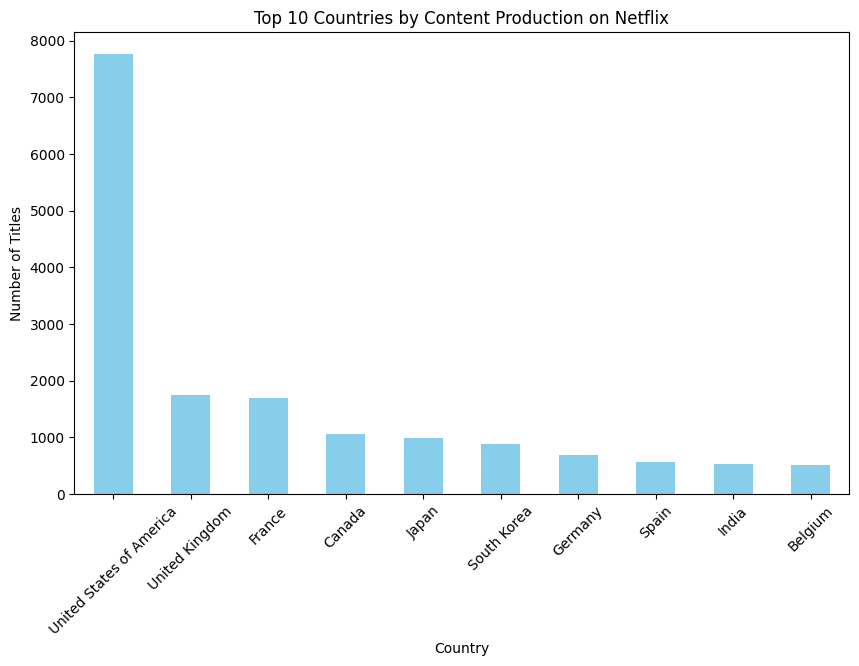

In [19]:
import matplotlib.pyplot as plt

# Analyze country-wise content production
country_distribution = data['country'].str.split(', ').explode().value_counts().head(10)

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Content Production on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

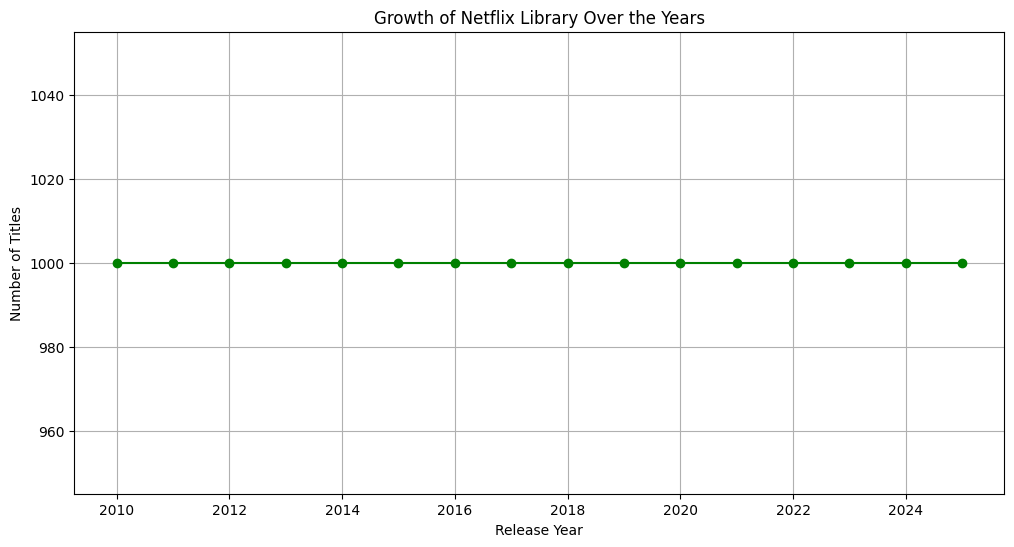

In [22]:
# Visualize the growth of the Netflix library over the years
plt.figure(figsize=(12, 6))
release_year_distribution.plot(kind='line', marker='o', color='green')
plt.title('Growth of Netflix Library Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

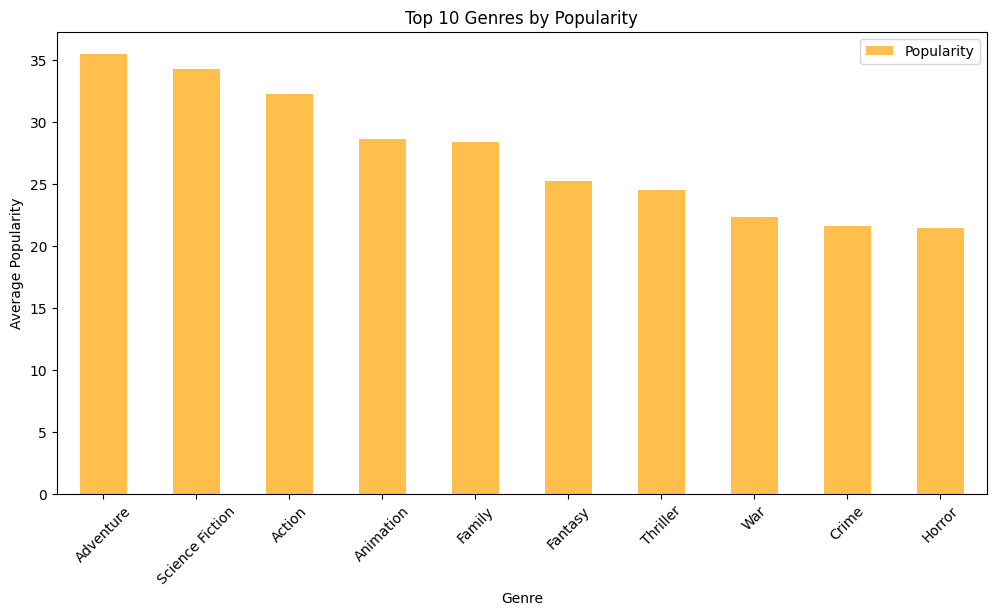

In [28]:
# Explore the relationship between popularity, vote_average, and genres
# Calculate average popularity and vote_average for each genre
genre_popularity = data['genres'].str.split(', ').explode()
genre_stats = genre_popularity.to_frame().join(data[['popularity', 'vote_average']]).groupby('genres').agg({'popularity': 'mean', 'vote_average': 'mean'}).sort_values(by='popularity', ascending=False).head(10)

# Visualize the relationship using a bar chart
plt.figure(figsize=(12, 6))
genre_stats['popularity'].plot(kind='bar', color='orange', alpha=0.7, label='Popularity')
plt.title('Top 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

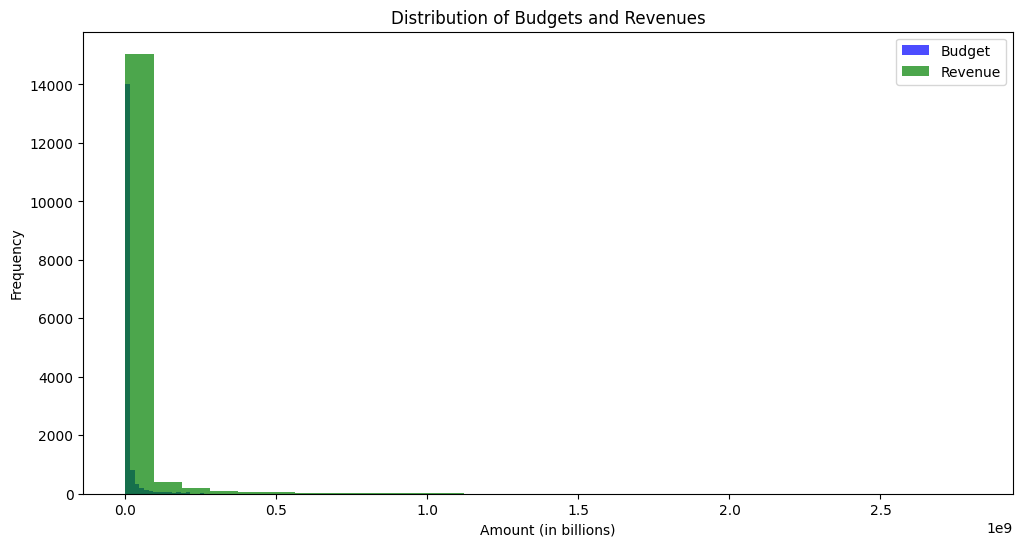

,title,profit
9001,Avengers: Endgame,2443439100
15019,Ne Zha 2,1910000000
12006,Avatar: The Way of Water,1860250281
5010,Star Wars: The Force Awakens,1823223624
8000,Avengers: Infinity War,1752415039
11000,Spider-Man: No Way Home,1721847111
5001,Jurassic World,1521537444
14026,Inside Out 2,1498863816
9000,The Lion King,1402020819
5008,Furious 7,1325400000


In [31]:
# Analyze the distribution of budgets and revenues
# Create histograms for budget and revenue
plt.figure(figsize=(12, 6))
plt.hist(data['budget'], bins=30, color='blue', alpha=0.7, label='Budget')
plt.hist(data['revenue'], bins=30, color='green', alpha=0.7, label='Revenue')
plt.title('Distribution of Budgets and Revenues')
plt.xlabel('Amount (in billions)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Identify the most profitable movies
data['profit'] = data['revenue'] - data['budget']
most_profitable_movies = data[['title', 'profit']].sort_values(by='profit', ascending=False).head(10)
most_profitable_movies

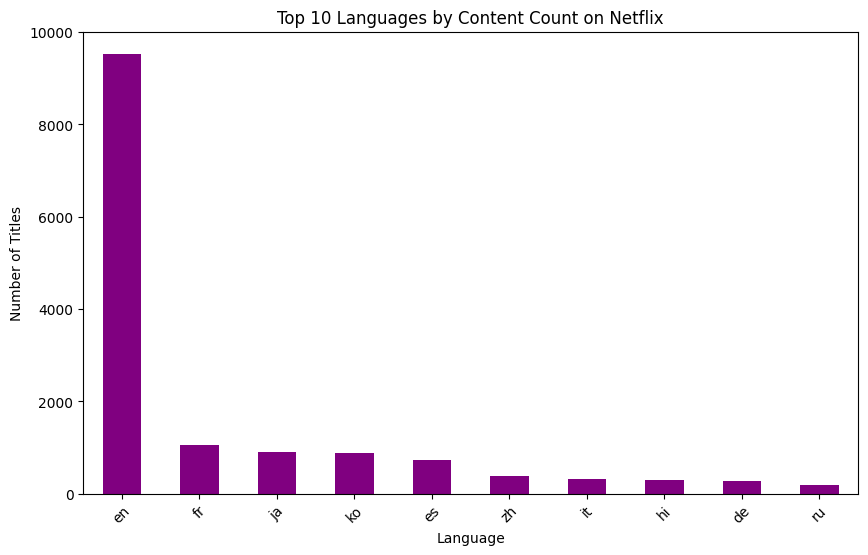

In [34]:
# Analyze the distribution of content by language
language_distribution = data['language'].value_counts().head(10)

# Visualize the distribution using a bar chart
plt.figure(figsize=(10, 6))
language_distribution.plot(kind='bar', color='purple')
plt.title('Top 10 Languages by Content Count on Netflix')
plt.xlabel('Language')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

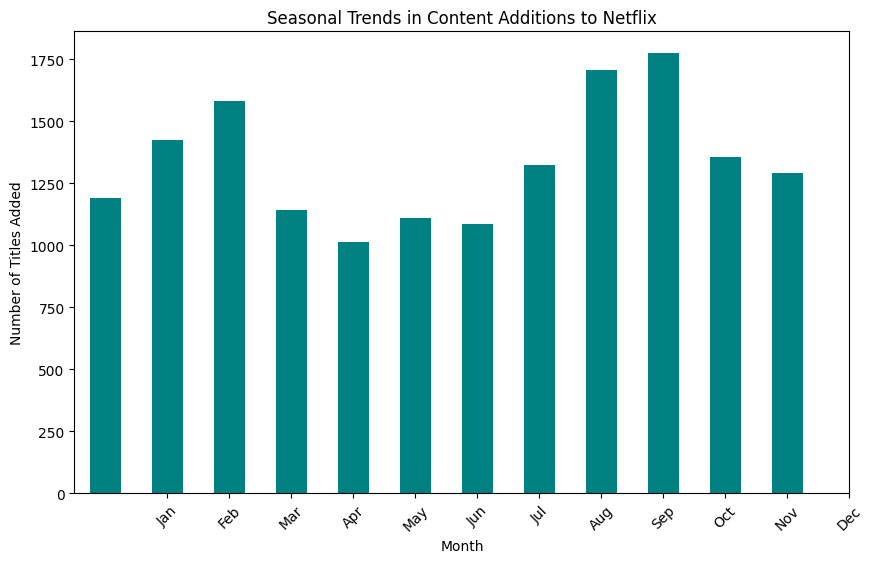

In [37]:
# Analyze when content was added to Netflix using the date_added column
# Convert date_added to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract the month from the date_added column
data['month_added'] = data['date_added'].dt.month

# Analyze the distribution of content additions by month
monthly_additions = data['month_added'].value_counts().sort_index()

# Visualize the seasonal trends using a bar chart
plt.figure(figsize=(10, 6))
monthly_additions.plot(kind='bar', color='teal')
plt.title('Seasonal Trends in Content Additions to Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [49]:
# The provided code contains shell commands that are not valid Python syntax.
# To execute these commands in a Jupyter Notebook, you need to prefix them with an exclamation mark (!).

# Remove the incorrect remote URL
!git remote remove origin

# Add the correct remote URL
!git remote add origin https://github.com/BhairavDataFlow/netflix-trend-analysis

# Push the changes to the correct repository
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [55]:
# The provided code contains shell commands that are not valid Python syntax.
# To execute these commands in a Jupyter Notebook, you need to prefix them with an exclamation mark (!).

# Stage all changes
!git add .

# Commit the changes with a message
!git commit -m "Initial commit: Netflix Content Trend Analysis"

# Push the changes to the remote repository
!git push -u origin main

fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /datasets)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1342907e-1597-4991-b544-e4181008d532' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>